In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy.interpolate import interp1d

In [2]:
def reduce_fn(num, rang = 10):
    hist = []
    num1 = num
    num2 = int(str(num)[::-1])
    for i in range(rang):
        hist.append(num1)
        num1 = organize(num1)
        num2 = organize(num1, reverse = False)
        num1 = max([num1, num2]) - min([num1, num2])
        num2 = int(str(num)[::-1])
        if i > 1 and hist[i] == hist[i-1]:
            break
        if hist[i] == 0:
            return [-1]
    return np.array(hist)

In [3]:
def organize(num, reverse = True):
    aux = str(num)
    temp = []
    for st in aux:
        temp.append(int(st))
    if reverse:
        temp.sort(reverse = True)
    else:
        temp.sort()
    ans = 0
    for i in range(len(temp)-1, -1, -1):
        j = len(temp)-1 - i
        ans += 10**j*temp[i]
    return ans

In [38]:
def draw_btw(digits = 3, size = 1900, rang = 10):
    mi = 10**(digits-1)
    ma = 10**(digits)-1
    plt.figure(figsize=(15,15))
    nums = size
    #colors = ['firebrick', 'brown', 'orangered', 'crimson',
     #         'black', 'gold', 'black', 'gold', 'firebrick', 'red']
        
    colors = ['firebrick', 'brown', 'orangered', 'crimson',
              'gold', 'gold', 'firebrick', 'red']

    colors = ['#1fff02', '#1fff02', '#1fff02', '#16ff05', '#005b00', '#03cb00', '#13e402',
              '#12d80f', '#05d100']
    
    for i in range(nums):
        rnd = np.random.randint(mi, ma)
        y = reduce_fn(rnd, rang)
        if y[0] == -1:
            continue
        x = np.arange(0, len(y))
        xnew = np.linspace(0, max(x), num = rang*50)
        try:
            f = interp1d(x, y, kind = 'cubic')
        except:
            continue
        plt.plot(f(xnew), xnew, '-', linewidth = 0.01, color = np.random.choice(colors))
    ax = plt.gca()
    ax.set_facecolor('xkcd:black')

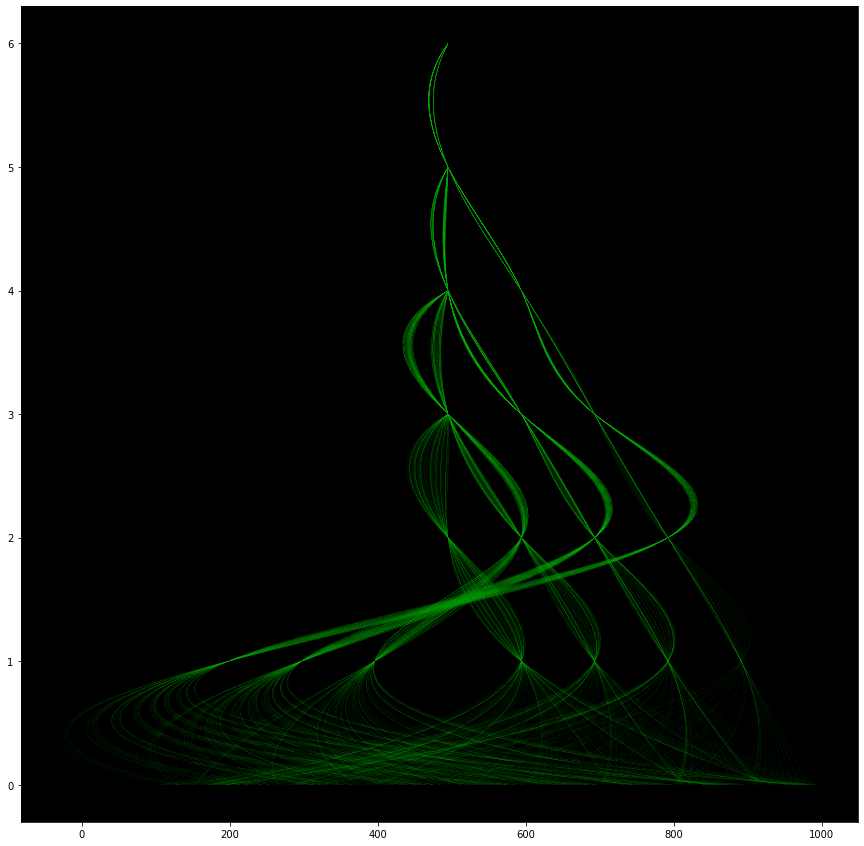

In [39]:
draw_btw(3, size = 4000)

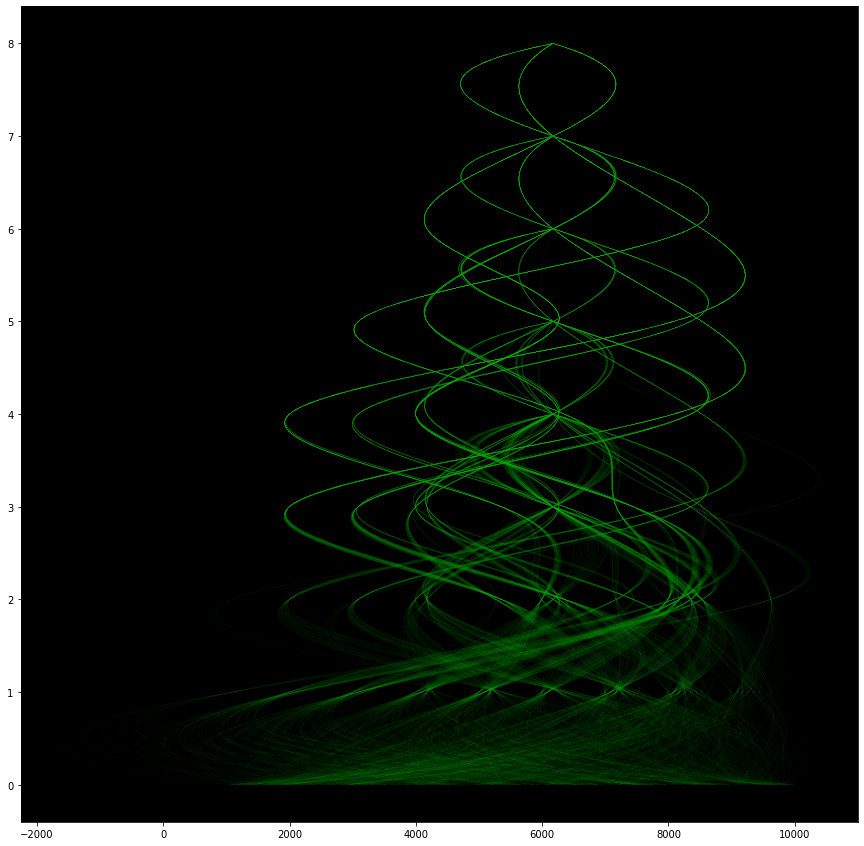

In [40]:
draw_btw(4, size = 4000)

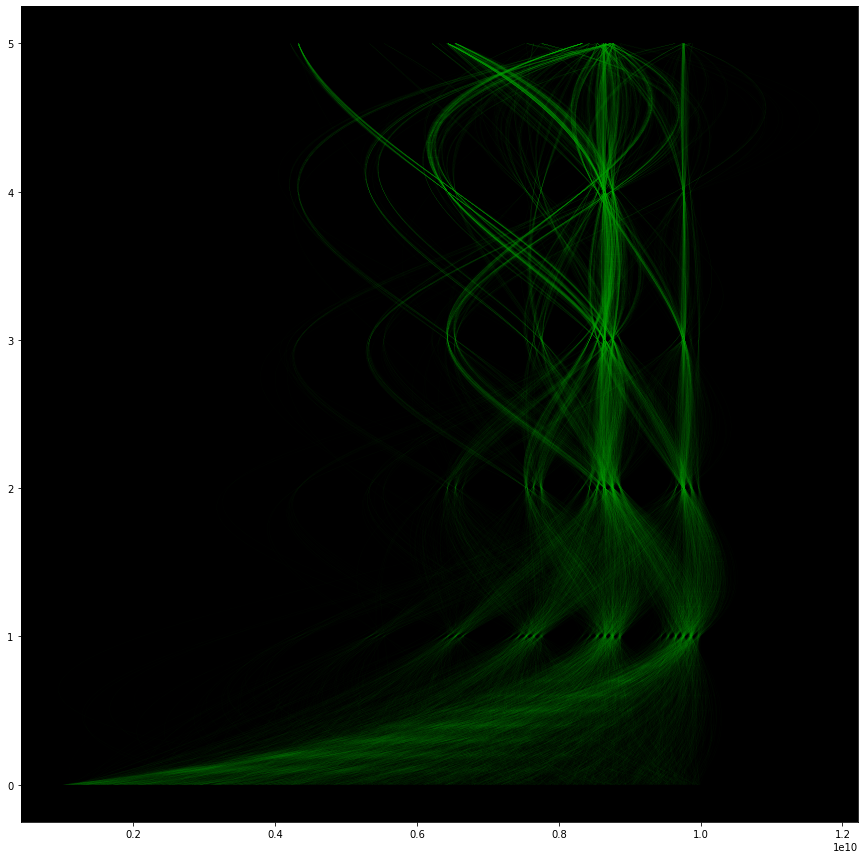

In [41]:
draw_btw(10, rang=6, size = 4000)

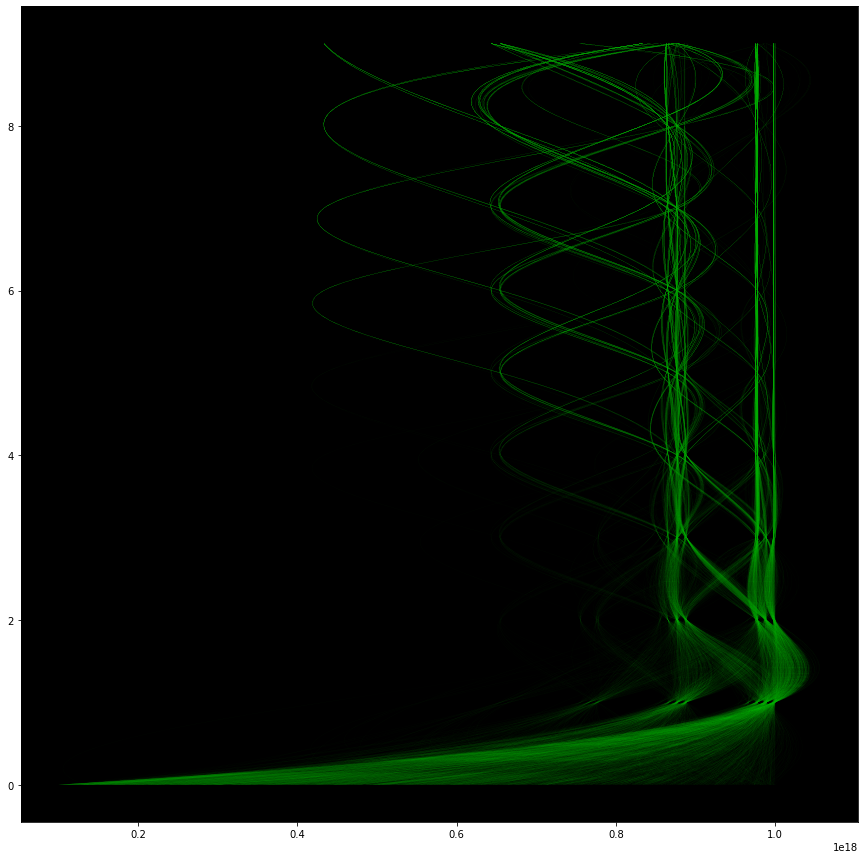

In [42]:
draw_btw(18, rang=10, size = 4000)

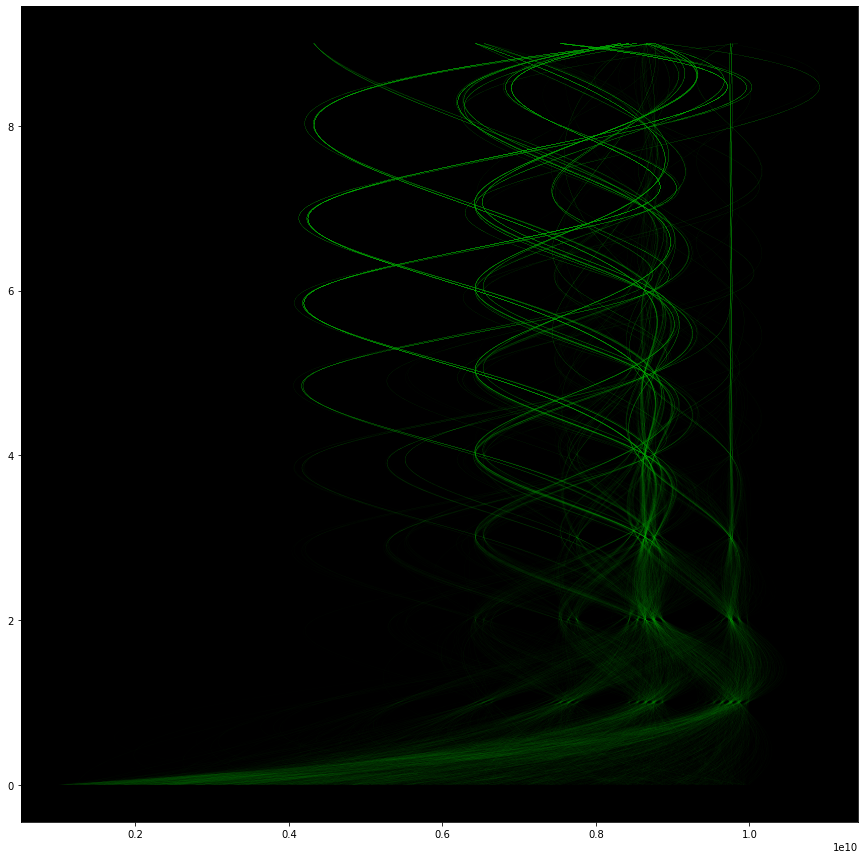

In [43]:
draw_btw(10)